<a href="https://colab.research.google.com/github/Jerejuniorr/HelpHair_DesafioAlura/blob/main/Imers%C3%A3o_Alura_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

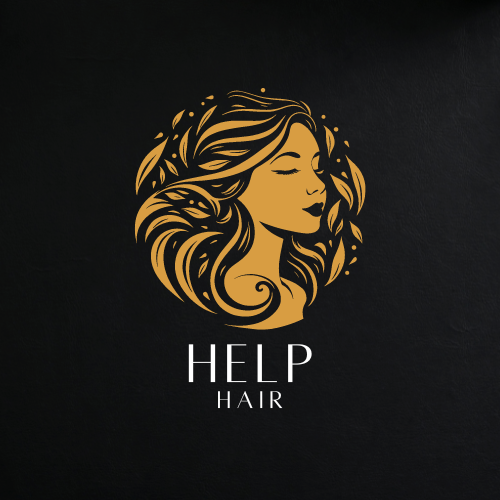

#**Cuidados Capilares**
Solucionamos a dificuldade na escolha de cosméticos capilares adequados às necessidades individuais de cada cliente, oferecendo recomendações personalizadas a partir da análise de seus dados.

O código implementa um chatbot especializado em recomendar cosméticos capilares. Ele usa a API do Google Gemini Pro, um modelo de linguagem avançado, para entender a descrição do cabelo do usuário (curvatura, alergias, procedimentos realizados) e sua necessidade (ex: oleosidade, frizz). Com base nessas informações, o chatbot gera uma resposta personalizada com sugestões de produtos.

**Aplicabilidade no mercado:**

*   *E-commerce:* Integrar o chatbot em sites de venda de cosméticos para oferecer um atendimento personalizado aos clientes, auxiliando na escolha do produto ideal.
*   *Marketing:* Criar campanhas interativas em redes sociais onde o chatbot analisa as necessidades dos usuários e recomenda produtos específicos, aumentando o engajamento e as vendas.
*   *Consultoria capilar:* Oferecer um serviço de consultoria capilar online, automatizando a análise do cabelo e a recomendação de produtos.
Em resumo, o código oferece uma solução automatizada para personalização de produtos, um diferencial competitivo relevante no mercado de cosméticos.

Em resumo, o código oferece uma solução automatizada para personalização de produtos, um diferencial competitivo relevante no mercado de cosméticos.



##**Iniciando**

In [2]:
#instalando genai
!pip install -q -U google-generativeai

#importando modelo e api key
import google.generativeai as genai
from google.colab import userdata

api_key = userdata.get('Api_Key')
genai.configure(api_key=api_key)

#configurando modelo
generation_config = {
  "temperature": 0.2,
  "top_p": 0.95,
  "top_k": 0,
}

#configurando segurança
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

##**Questionário**


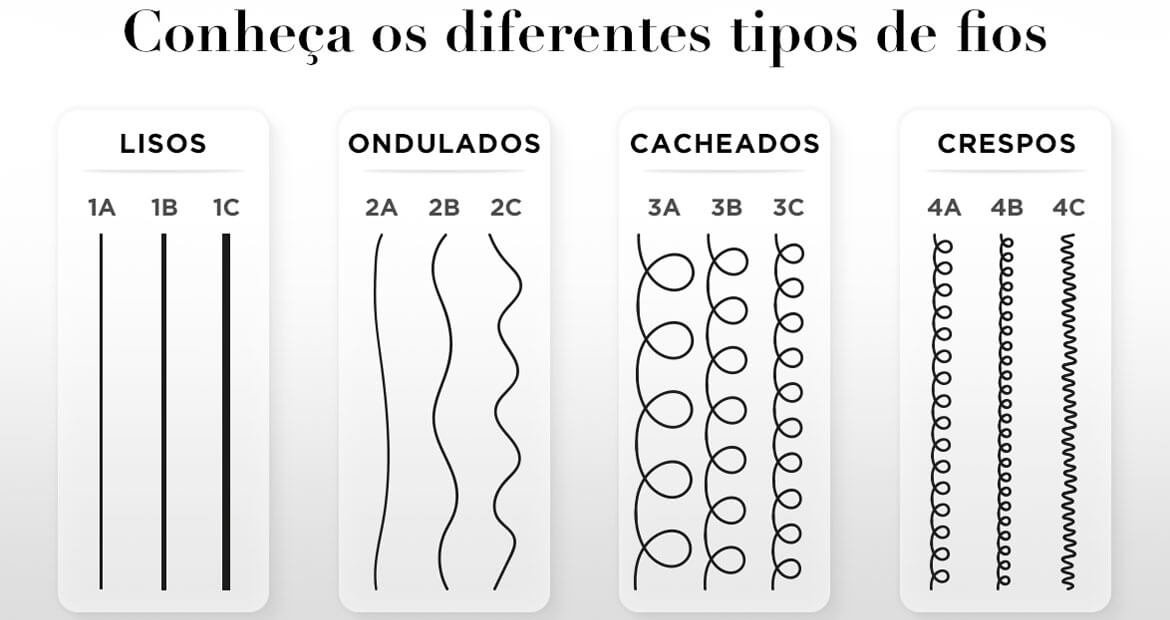

In [3]:
#Mostra imagem para as perguntas
!wget -q -O 'tipos_de_fios' 'https://www.loreal-paris.com.br/-/media/project/loreal/brand-sites/oap/americas/br/cabelos-2022/cabelo-ondulado/cabelo-ondulado-tipo-de-cabelo.jpg'

import cv2
from google.colab.patches import cv2_imshow

imagem = cv2.imread('tipos_de_fios')
cv2_imshow(imagem)

In [6]:
a# Cria o widget de texto para input (Tipo de fio?)
print('\n Escolha dentre as opções acima qual melhor corresponde ao seu tipo de cabelo.\n Exemplo de resposta: 2c')
hairtype = input(' - ')

# Possui alergia?
print('\n Possui alergia à algum produto quimico?')
alergia = input(' - ')


# Realizou algum procedimento recentemente?
print('\n Realizou algum procedimento capilar recentemente?\n Exemplo: Chapinha, progressiva, pintura, etc.')
procedimento = input(' - ')

# descrição do cabelo
print('\n Descreva a condição atual do seu cabelo:\n Exemplo:Meu cabelo está seco, quebradiço e com muito frizz.')
descricao = input(' - ')



 Escolha dentre as opções acima qual melhor corresponde ao seu tipo de cabelo.
 Exemplo de resposta: 2c
 - 2c

 Possui alergia à algum produto quimico?
 - não

 Realizou algum procedimento capilar recentemente?
 Exemplo: Chapinha, progressiva, pintura, etc.
 - selagem orgânica

 Descreva a condição atual do seu cabelo:
 Exemplo:Meu cabelo está seco, quebradiço e com muito frizz.
 - meu cabelo está fino, com pontas secas e apresentadno quedas

 Escolha dentre as opções acima qual melhor corresponde ao seu tipo de cabelo.
 Exemplo de resposta: 2c
 - 2c

 Possui alergia à algum produto quimico?
 - não

 Realizou algum procedimento capilar recentemente?
 Exemplo: Chapinha, progressiva, pintura, etc.
 - selagem orgânica

 Descreva a condição atual do seu cabelo:
 Exemplo:Meu cabelo está seco, quebradiço e com muito frizz.
 - meu cabelo está fino, com pontas secas e apresentadno quedas


##**Tratamento**

In [7]:
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

prompt_parts = [
  "aja como um vendedor de cosméticos capilares. Analise a descriçao do cabelo e sua necessidade. Recomende porduto que solucione a demanda",
  "Curvatura: 1c",
  "alergia: não",
  "Procedimento: Não",
  "Descricao: Meu cabelo está seco",
  "Produto: #**Seco**: É necessário repor a nutrição. Utilize produtos à base de óleo.\n**Sugestões**: \n-Copra Óleo De Côco Extra Virgem;\n-Widi Care - Óleo de argan\n-Salon Line - Óleo de oliva: Máscara Capilar",
  "Curvatura: 4b",
  "alergia: alergia à coco",
  "Procedimento: fiz chapinha",
  "Descricao: meu cabelo tá oleoso e com friz",
  "Produto: #**Oleosidade**: A oleosidade do couro cabeludo é comum, mas o excesso deve ser tratado, utilize shampoos específicos.\n**Sugestões**: \n- Elseve-Pure Hialurônico Shampoo\n-Truss Professional Shampoo Equilibrium, Controle da oleosidade\n\n#**Frizz**: Procedimentos químicos e/ou térmicos, como a sua chapinha, podem causar as quebras dos fio e gerar o frizz.\n**Sugestões**: \n-Pantene Pro-V Miracles Equilíbrio Raiz e Pontas Sérum Revitalizador\n-Itallian Hairtech Reparador De Pontas",
  "Curvatura: 3b",
  "alergia: argan",
  "Procedimento: recentemente fiz progressiva",
  "Descricao: meu cabelo ta com ponta dupla, seco e caindo",
  "Produto: #**Ponta dupla**: Quando há um dano, mecânico, térmico ou químico, a cutícula da ponta se desgasta e separa. Após uma progressiva pontas duplas podem ser normais, você pode realizar uma \"emenda\"\n**Sugestões**: \n-Novex Creme De Tratamento, Recomposição Capilar -Niacinamida\n-Dove Máscara Capilar De Tratamento Ritual De Reparação\n\n#**Seco**: É possível que o cabelo ficar seco após a progressiva\n**Sugestões**: \n- Felps Xbtx Quiabo Okra Alinhamento Capilar\n-Amend Condicionador Intensificador pós progressiva\n\n#**Caindo**: Procedimentos químicos e térmicos podem estressar o cabelo e resultar em queda.\nOBS: Quedas de cabelo podem ser resultados de outros fatores como como anemia, déficit de nutrientes e disfunções na tireoide. \nCuide da alimentação, hidrate-se, reduza o estresse, evite fumar, suspenda as químicas, Se persistir procure um médico.\n**Sugestões**: \n-Inoar \nShampoo Crescimento Capilar \n- Lumina \nShampoo Estimulante para Antiqueda e Crescimento\n-Salon Line \nShampoo Sos Bomba Vitaminas Unit",
  "Curvatura: 1b",
  "alergia: não",
  "Procedimento: pintura",
  "Descricao: quero hidratar meu cabelo",
  "Produto: #**Hidratação**: para manter uma boa hidratação após o procedimento lave o cabelo apenas 2 - 3 vezes por semana para preservar a oleosidade natural, voce precisa repor a umidade perdida e garantir uma proteção térmica\n**Sugestões**:\n- Boni Natural\nShampoo Vegano e Natural de Argan e Linhaça\n-Elseve Haircare Creme De Tratamento L'Oréal Elseve Pure Hialurônico\n-Phytoervas Protetor Capilar Sol, Macela e Aquiléia",
  "Curvatura: 2c",
  "alergia: Phenoxyethanol",
  "Procedimento: nenhum",
  "Descricao: sem brilho",
  "Produto: #**Brilho**: Uso frequente de cremes podem gerar acumulo de resíduos e diminuir o brilho,  o cableo pode precisar de uma hidratação extra para recuperar o brilho.\n**Sugestão**:\n- Salon Line Shampoo Detox\n- Máscara Novex Doctor Rícino",
  "Curvatura: " + hairtype,
  "alergia: " + alergia,
  "Procedimento: " + procedimento,
  "Descricao: " + descricao,
  "Produto: ",
]

response = model.generate_content(prompt_parts)
print(response.text)

## Análise do cabelo e sugestões de produtos:

**Curvatura:** 2c
**Alergia:** Não
**Procedimento:** Selagem orgânica 
**Descrição:** Meu cabelo está fino, com pontas secas e apresentando quedas.

É normal que após procedimentos químicos, como a selagem orgânica, o cabelo apresente algumas alterações. Vamos analisar cada ponto e indicar os produtos ideais para você:

**#Fino:**

A selagem pode ter deixado seu cabelo com aspecto mais fino, pois alisa os fios. Para dar volume, podemos usar produtos específicos:

**Sugestões:**

* **Shampoo e Condicionador Volumizador:** Experimente o *Lola Cosmetics Shampoo Volumão* e o *Condicionador Volumão*. Eles ajudam a encorpar os fios, dando a sensação de mais volume.
* **Mousse:** A *Mousse Volumizadora da Wella Professionals* é ótima para aplicar na raiz e dar aquele UP no visual.

**#Pontas Secas:**

A selagem pode ressecar as pontas, principalmente se não houver uma boa manutenção. 

**Sugestões:**

* **Óleo Capilar:** O *Óleo de Coco Extra Vir

##**Possibilidades**
O Código tem escalabilidade, uma vez que é possível implentá-lo com o sistema da loja e fazer recomendações dos produtos em estoque, apontando preços e promoções.